In [1]:
def set_size(width_pt, fraction=1, subplots=(1, 1)):
    """Set figure dimensions to sit nicely in our document.

    Parameters
    ----------
    width_pt: float
            Document width in points
    fraction: float, optional
            Fraction of the width which you wish the figure to occupy
    subplots: array-like, optional
            The number of rows and columns of subplots.
    Returns
    -------
    fig_dim: tuple
            Dimensions of figure in inches
    """
    # Width of figure (in pts)
    fig_width_pt = width_pt * fraction
    # Convert from pt to inches
    inches_per_pt = 1 / 72.27

    # Golden ratio to set aesthetic figure height
    golden_ratio = (5**.5 - 1) / 2

    # Figure width in inches
    fig_width_in = fig_width_pt * inches_per_pt
    # Figure height in inches
    fig_height_in = fig_width_in * golden_ratio * (subplots[0] / subplots[1])

    return (fig_width_in, fig_height_in)

In [201]:
import numpy as np
import matplotlib.pyplot as plt
import os
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset
from scipy.signal import find_peaks
from brokenaxes import brokenaxes
import pandas as pd

# Update matplotlib settings
plt.rcParams.update({
    "font.family": "serif",
    "text.usetex": True,
    "pgf.rcfonts": False
})
plt.rcParams['font.size'] = 14

## Task 1

In [32]:
# Get the current working directory
cwd = os.getcwd()

# Get the path to the Task 1 folder
path = os.path.join(cwd, 'Task 1')

# Get the list of files in the Task 1 folder
files = os.listdir(path)

# Initialize the list of data
data = []

# Loop through the files in the Task 1 folder
for file in files:
    # Check if the file is a .asc file
    if file.endswith('.asc'):
        # Get the path to the file
        file_path = os.path.join(path, file)
        
        # Open the file
        with open(file_path, 'r') as f:
            # Read the lines of the file
            lines = f.readlines()
            
            # Initialize the data list for the current file
            file_data = []
            
            # Loop through the lines of the file
            for line in lines:
                # Check if the line contains the data
                if line.startswith('#DATA'):
                    # Get the index of the line
                    index = lines.index(line)
                    
                    # Loop through the lines after the line that says #DATA
                    for i in range(index + 1, len(lines)):
                        # Replace commas with dots in the line
                        line = lines[i].replace('.', '.')
                        
                        # Split the line into values and convert them to floats
                        values = [float(value) for value in line.split()]
                        
                        # Append the values to the file data list
                        file_data.append(values)
            
            # Append the file name and file data to the data list
            data.append((file, file_data))


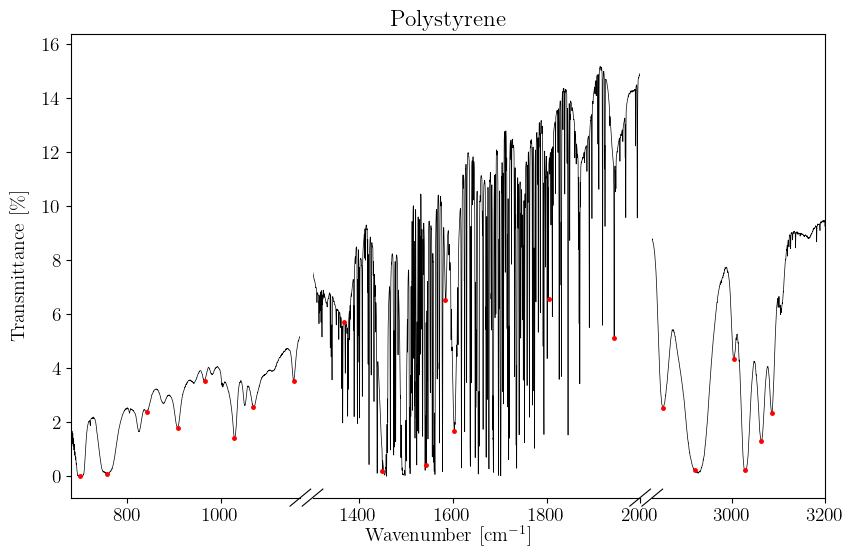

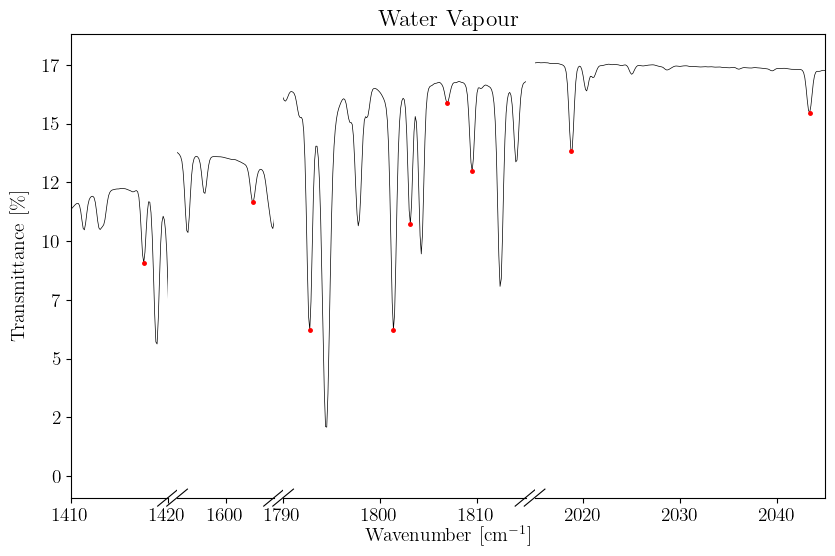

Water Vapour Data:
   Theoretical  Experimental  Percentage Change
0      1416.08      1417.500           0.100277
1      1601.20      1602.875           0.104609
2      1792.65      1792.750           0.005578
3      1799.61      1801.375           0.098077
4      1802.47      1803.125           0.036339
5      1807.70      1806.875          -0.045638
6      1810.62      1809.500          -0.061857
7      2018.32      2018.750           0.021305
8      2041.30      2043.375           0.101651

Polystyrene Data:
    Theoretical  Experimental  Percentage Change
0        699.45       699.125          -0.046465
1        756.58       756.625           0.005948
2        842.00       841.375          -0.074228
3        906.80       907.750           0.104764
4        965.70       965.875           0.018122
5       1028.30      1028.875           0.055918
6       1069.10      1069.375           0.025723
7       1154.60      1155.750           0.099602
8       1368.50      1367.750          -0

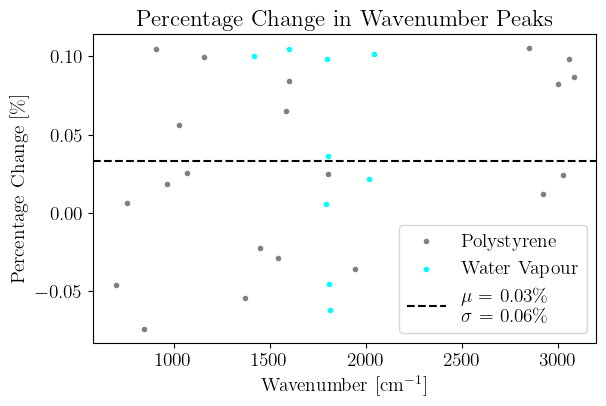

In [204]:
# Define the peak ranges for Water vapor and Polystyrene
peak_ranges = {
    'Water Vapour': [1416.08, 1601.20, 1792.65, 1799.61, 1802.47, 1807.70, 1810.62, 2018.32, 2041.3],
    'Polystyrene': [699.45, 756.58, 842.0, 906.8, 965.7, 1028.3, 1069.1, 1154.6, 1368.5, 1449.7, 1542.2, 1583.1, 1601.4, 1803.8, 1945.2, 2850.0, 2920.9, 3001.4, 3026.4, 3060.0, 3082.2]
}

# Function to find dips within a specified range
def find_dips_in_range(x, y, dip_values, prominence=None):
    inverted_y = -y
    if prominence:
        dips, _ = find_peaks(inverted_y, prominence=prominence)
    else:
        dips, _ = find_peaks(inverted_y)
    closest_dips = []
    for dip in dip_values:
        closest_dip = min(dips, key=lambda d: abs(x[d] - dip))
        if abs(x[closest_dip] - dip) < 4:
            closest_dips.append(closest_dip)
    return closest_dips

# Function to calculate percentage change
def calculate_percentage_change(theoretical, experimental):
    return [(exp - theo) / theo * 100 for theo, exp in zip(theoretical, experimental)]

# Store percentage changes for plotting
percentage_changes = {}

# Plot all data individually
for file, file_data in data:
    # Convert the data to a numpy array
    data_array = np.vstack(file_data)
    
    # Get data
    x = data_array[:, 0]
    y = data_array[:, 1]
    
    # Create a new figure with broken axes
    if 'Water' in file:
        bax = brokenaxes(xlims=((1410, 1420), (1595, 1605), (1790, 1815), (2015, 2045)), wspace=.05)
        # Set y-axis formatter to remove decimal points for each subplot
        for ax in bax.axs:
            ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x)}'))
    else:
        bax = brokenaxes(xlims=((680,1170),  (1300, 2000),(2830, 3200) ), wspace=0.05)

    # Plot
    bax.plot(x, y, color='black', linewidth=0.5)
    
    # Remove the .asc extension from the file name
    file_name_without_ext = os.path.splitext(file)[0]
    
    # Set the title of the plot
    bax.set_title(file_name_without_ext)
    
    # Set the labels of the x and y axes
    bax.set_xlabel('Wavenumber [cm$^{-1}$]', labelpad=20)
    bax.set_ylabel('Transmittance [$\%$]')
    bax.fig.set_size_inches(set_size(469*1.5))
    
    # Check if the file name matches any key in the peak_ranges dictionary
    for key, dip_values in peak_ranges.items():
        if key in file_name_without_ext:
            # Determine prominence based on the key
            prominence = 0.3 if key == 'Water Vapour' else None
            # Find dips within the specified range
            dips_in_range = find_dips_in_range(x, y, dip_values, prominence)
            experimental_dips = [x[dip] for dip in dips_in_range]
            # Ensure the lengths match before calculating percentage changes
            if len(dip_values) == len(experimental_dips):
                # Calculate percentage changes
                percentage_changes[key] = (dip_values, experimental_dips, calculate_percentage_change(dip_values, experimental_dips))
            else:
                print(f"Warning: Length mismatch for {key}. Theoretical: {len(dip_values)}, Experimental: {len(experimental_dips)}")
            # Plot the dips
            bax.plot(x[dips_in_range], y[dips_in_range], ".", color="red", markersize=5)
            
        
    bax.big_ax.spines['right'].set_visible(True)
    bax.big_ax.spines['top'].set_visible(True)
    
    plt.show()

# Separate percentage changes for Water Vapour and Polystyrene
water_vapour_data = percentage_changes.get('Water Vapour', ([], [], []))
polystyrene_data = percentage_changes.get('Polystyrene', ([], [], []))

# Create DataFrames for Water Vapour and Polystyrene
df_water_vapour = pd.DataFrame({
    'Theoretical': water_vapour_data[0],
    'Experimental': water_vapour_data[1],
    'Percentage Change': water_vapour_data[2]
})

df_polystyrene = pd.DataFrame({
    'Theoretical': polystyrene_data[0],
    'Experimental': polystyrene_data[1],
    'Percentage Change': polystyrene_data[2]
})

# Output the DataFrames to CSV files
df_water_vapour.to_csv('Task 1\water_vapour_data.csv', index=False)
df_polystyrene.to_csv('Task 1\polystyrene_data.csv', index=False)

# Print the DataFrames
print("Water Vapour Data:")
print(df_water_vapour)
print("\nPolystyrene Data:")
print(df_polystyrene)

# Plot percentage changes on the same plot with different colored dots
plt.figure(figsize=set_size(469))
colors = ['gray', 'aqua']  # List of colors for different keys
for i, (key, (theoretical, experimental, changes)) in enumerate(percentage_changes.items()):
    plt.scatter(theoretical, changes, color=colors[i % len(colors)], label=key, marker='.')

# Calculate and print the overall average percentage change and standard deviation
all_changes = water_vapour_data[2] + polystyrene_data[2]
overall_avg_change = np.mean(all_changes)
overall_std_change = np.std(all_changes)
print(f"Overall average percentage change: {overall_avg_change:.2f}%")
print(f"Overall standard deviation of percentage change: {overall_std_change:.2f}%")

# Plot the overall average and standard deviation
plt.axhline(overall_avg_change, color='black', linestyle='--', label=f'$\mu$ = {overall_avg_change:.2f}$\%$ \n $\sigma$ = {overall_std_change:.2f}$\%$')
plt.xlabel('Wavenumber [cm$^{-1}$]')
plt.ylabel('Percentage Change [$\%$]')
plt.title('Percentage Change in Wavenumber Peaks')
plt.legend()
plt.show()

## Task 2

In [205]:
# Get the current working directory
cwd = os.getcwd()

# Get the path to the Task 1 folder
path = os.path.join(cwd, 'Task 2')

# Get the list of files in the Task 1 folder
files = os.listdir(path)

# Initialize the list of data
data = []

# Loop through the files in the Task 1 folder
for file in files:
    # Check if the file is a .asc file
    if file.endswith('.asc'):
        # Get the path to the file
        file_path = os.path.join(path, file)
        
        # Open the file
        with open(file_path, 'r') as f:
            # Read the lines of the file
            lines = f.readlines()
            
            # Initialize the data list for the current file
            file_data = []
            
            # Loop through the lines of the file
            for line in lines:
                # Check if the line contains the data
                if line.startswith('#DATA'):
                    # Get the index of the line
                    index = lines.index(line)
                    
                    # Loop through the lines after the line that says #DATA
                    for i in range(index + 1, len(lines)):
                        # Replace commas with dots in the line
                        line = lines[i].replace('.', '.')
                        
                        # Split the line into values and convert them to floats
                        values = [float(value) for value in line.split()]
                        
                        # Append the values to the file data list
                        file_data.append(values)
            
            # Append the file name and file data to the data list
            data.append((file, file_data))


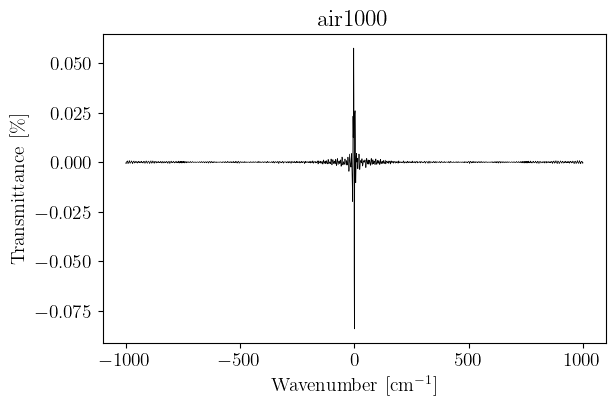

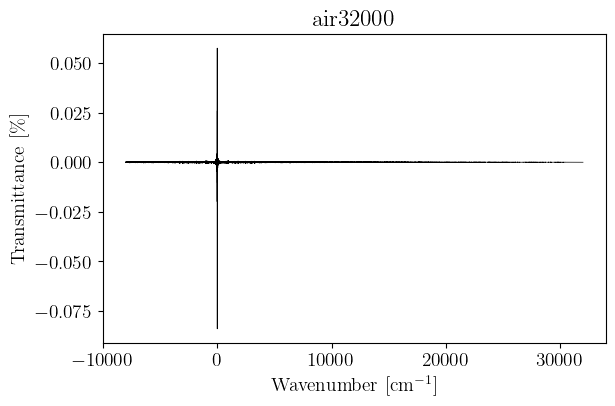

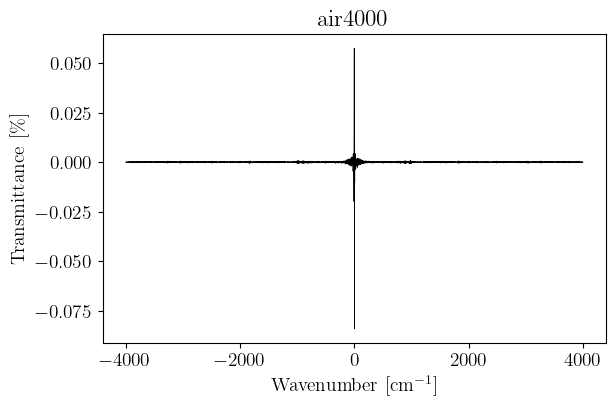

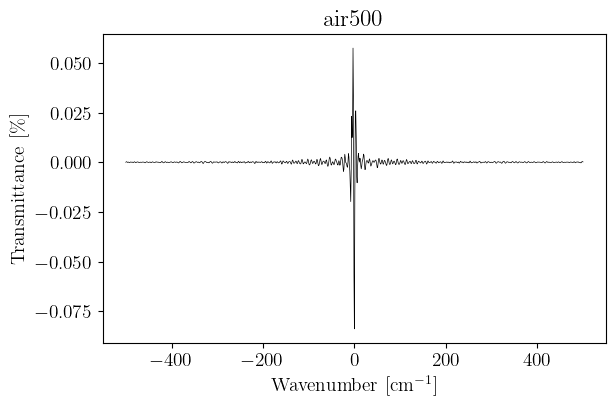

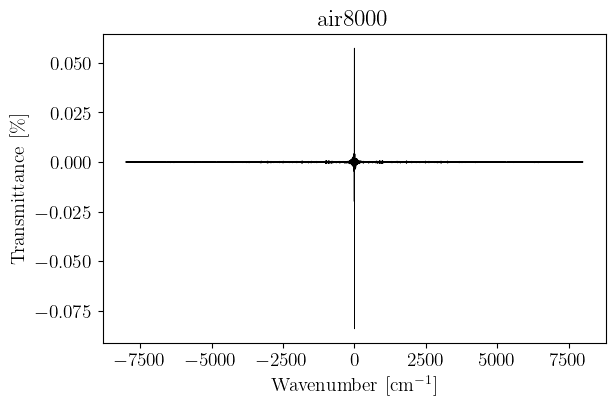

In [206]:
# Plot all data individually
for file, file_data in data:
    # Convert the data to a numpy array
    data_array = np.vstack(file_data)
    
    # Get data
    x = data_array[:, 0]
    y = data_array[:, 1]

    # plot the data
    plt.figure(figsize=set_size(469))
    plt.plot(x, y, color='black', linewidth=0.5)

    # Remove the .asc extension from the file name
    file_name_without_ext = os.path.splitext(file)[0]

    # Set the title of the plot
    plt.title(file_name_without_ext)

    # Set the labels of the x and y axes
    plt.xlabel('Wavenumber [cm$^{-1}$]')
    plt.ylabel('Transmittance [$\%$]')
    plt.show()
    

In [210]:
# Get the current working directory
cwd = os.getcwd()

# Get the path to the Task 1 folder
path = os.path.join(cwd, 'Task 5')

# Get the list of files in the Task 1 folder
files = os.listdir(path)

# Initialize the list of data
data = []

# Loop through the files in the Task 1 folder
for file in files:
    # Check if the file is a .asc file
    if file.endswith('.asc'):
        # Get the path to the file
        file_path = os.path.join(path, file)
        
        # Open the file
        with open(file_path, 'r') as f:
            # Read the lines of the file
            lines = f.readlines()
            
            # Initialize the data list for the current file
            file_data = []
            
            # Loop through the lines of the file
            for line in lines:
                # Check if the line contains the data
                if line.startswith('#DATA'):
                    # Get the index of the line
                    index = lines.index(line)
                    
                    # Loop through the lines after the line that says #DATA
                    for i in range(index + 1, len(lines)):
                        # Replace commas with dots in the line
                        line = lines[i].replace('.', '.')
                        
                        # Split the line into values and convert them to floats
                        values = [float(value) for value in line.split()]
                        
                        # Append the values to the file data list
                        file_data.append(values)
            
            # Append the file name and file data to the data list
            data.append((file, file_data))


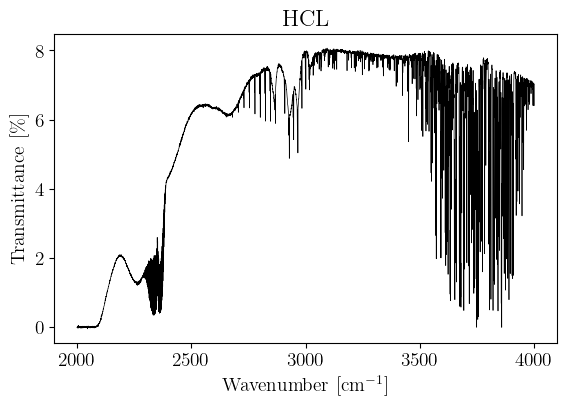

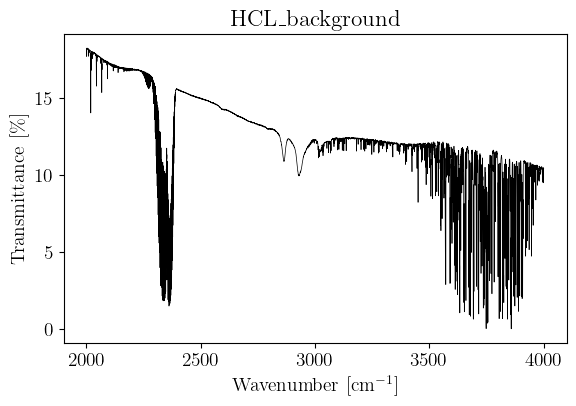

In [211]:
# Plot all data individually
for file, file_data in data:
    # Convert the data to a numpy array
    data_array = np.vstack(file_data)
    
    # Get data
    x = data_array[:, 0]
    y = data_array[:, 1]

    # plot the data
    plt.figure(figsize=set_size(469))
    plt.plot(x, y, color='black', linewidth=0.5)

    # Remove the .asc extension from the file name
    file_name_without_ext = os.path.splitext(file)[0]

    # Set the title of the plot
    plt.title(file_name_without_ext)

    # Set the labels of the x and y axes
    plt.xlabel('Wavenumber [cm$^{-1}$]')
    plt.ylabel('Transmittance [$\%$]')
    plt.show()
    